<div class="alert alert-block alert-success">
    <h1 style="color:blue;" , align="center">Machine Learning in Python</h1>
    <h3 style="color:green;" , align = "center">Omid Rahmanzadeh</h3>
</div>

<div class="alert alert-block alert-success">
    <h2 align="center">Covid Vaccination</h2>
</div>

## Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from pandasql import sqldf
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Load and Prepare Data

In [128]:
covid_df = pd.read_csv(r"C:\Users\STOCKLAND\Desktop\ML\MachinLearn\Project\Project 1 - Covid Vaccination\country_vaccinations.csv")
covid_manufacturer_df = pd.read_csv(r"C:\Users\STOCKLAND\Desktop\ML\MachinLearn\Project\Project 1 - Covid Vaccination\country_vaccinations_by_manufacturer.csv")

In [129]:
covid_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31235,Zimbabwe,ZWE,2021-07-11,1491397.0,895980.0,595417.0,NaN,18598.0,10.03,6.03,4.01,1251.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31236,Zimbabwe,ZWE,2021-07-12,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31237,Zimbabwe,ZWE,2021-07-13,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31238,Zimbabwe,ZWE,2021-07-14,1613640.0,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...


In [130]:
covid_manufacturer_df

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,30974
4,Austria,2021-01-15,Johnson&Johnson,0
...,...,...,...,...
9152,Uruguay,2021-07-14,Pfizer/BioNTech,1229299
9153,Uruguay,2021-07-14,Sinovac,3140277
9154,Uruguay,2021-07-15,Oxford/AstraZeneca,61907
9155,Uruguay,2021-07-15,Pfizer/BioNTech,1255929


In [131]:
covid_df.nunique()

country                                  218
iso_code                                 218
date                                     226
total_vaccinations                     16997
people_vaccinated                      15954
people_fully_vaccinated                13072
daily_vaccinations_raw                 12463
daily_vaccinations                     17641
total_vaccinations_per_hundred          6967
people_vaccinated_per_hundred           5431
people_fully_vaccinated_per_hundred     3943
daily_vaccinations_per_million          9400
vaccines                                  53
source_name                               92
source_website                           148
dtype: int64

In [132]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   iso_code                             31240 non-null  object 
 2   date                                 31240 non-null  object 
 3   total_vaccinations                   17451 non-null  float64
 4   people_vaccinated                    16554 non-null  float64
 5   people_fully_vaccinated              13795 non-null  float64
 6   daily_vaccinations_raw               14421 non-null  float64
 7   daily_vaccinations                   30948 non-null  float64
 8   total_vaccinations_per_hundred       17451 non-null  float64
 9   people_vaccinated_per_hundred        16554 non-null  float64
 10  people_fully_vaccinated_per_hundred  13795 non-null  float64
 11  daily_vaccinations_per_milli

In [133]:
# covid_df['date'] = pd.to_datetime(covid_df['date'])

In [134]:
covid_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.745100e+04,1.655400e+04,1.379500e+04,1.442100e+04,3.094800e+04,17451.000000,16554.000000,13795.000000,30948.000000
mean,1.200444e+07,5.704551e+06,3.293973e+06,2.273661e+05,1.149718e+05,29.283554,19.181574,12.340698,3426.365969
std,6.622349e+07,2.101612e+07,1.234425e+07,1.258556e+06,8.460548e+05,35.042304,20.734193,15.857682,4572.377684
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.262015e+05,9.999100e+04,4.832450e+04,4.324000e+03,8.520000e+02,2.970000,2.580000,1.320000,412.000000
50%,8.890780e+05,6.450395e+05,3.632100e+05,2.133600e+04,6.471000e+03,14.510000,10.730000,5.560000,1851.000000
75%,4.213660e+06,2.809300e+06,1.635366e+06,9.441700e+04,3.545425e+04,44.460000,30.890000,17.610000,5123.000000
max,1.426347e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,232.350000,116.660000,115.690000,118759.000000


In [135]:
covid_df.shape

(31240, 15)

## EDA & Missing Values

In [136]:
q = "SELECT * FROM covid_df WHERE  total_vaccinations  IS NULL "
not_null_df = sqldf(q , globals())
not_null_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-23,None,NaN,NaN,None,1367.0,None,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-24,None,NaN,NaN,None,1367.0,None,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-25,None,NaN,NaN,None,1367.0,None,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-26,None,NaN,NaN,None,1367.0,None,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-27,None,NaN,NaN,None,1367.0,None,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13784,Zambia,ZMB,2021-07-06,None,NaN,NaN,None,2138.0,None,NaN,NaN,116.0,"Oxford/AstraZeneca, Sinopharm/Beijing",Government of Zambia,https://rtc-planning.maps.arcgis.com/apps/dash...
13785,Zimbabwe,ZWE,2021-02-19,None,NaN,NaN,None,328.0,None,NaN,NaN,22.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
13786,Zimbabwe,ZWE,2021-02-20,None,NaN,NaN,None,328.0,None,NaN,NaN,22.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
13787,Zimbabwe,ZWE,2021-02-21,None,NaN,NaN,None,328.0,None,NaN,NaN,22.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...


In [137]:
afg = covid_df.query("country == 'Afghanistan'")
afg

afg.head(20)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
7,Afghanistan,AFG,2021-03-01,NaN,NaN,NaN,NaN,1580.0,NaN,NaN,NaN,41.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
8,Afghanistan,AFG,2021-03-02,NaN,NaN,NaN,NaN,1794.0,NaN,NaN,NaN,46.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
9,Afghanistan,AFG,2021-03-03,NaN,NaN,NaN,NaN,2008.0,NaN,NaN,NaN,52.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [138]:
date = covid_df.date.str.split('-', expand =True)
date

,0,1,2
0,2021,02,22
1,2021,02,23
2,2021,02,24
3,2021,02,25
4,2021,02,26
...,...,...,...
31235,2021,07,11
31236,2021,07,12
31237,2021,07,13
31238,2021,07,14


In [139]:
date_vax = covid_manufacturer_df.date.str.split('-', expand=True)
date_vax

,0,1,2
0,2021,01,08
1,2021,01,08
2,2021,01,08
3,2021,01,08
4,2021,01,15
...,...,...,...
9152,2021,07,14
9153,2021,07,14
9154,2021,07,15
9155,2021,07,15


In [140]:
covid_df['year'] = date[0]
covid_df['month'] = date[1]
covid_df['day'] = date[2]
covid_df.year = pd.to_numeric(covid_df.year )
covid_df.month = pd.to_numeric(covid_df.month)
covid_df.day = pd.to_numeric(covid_df.day)
covid_df.date = pd.to_datetime(covid_df.date)
covid_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,22
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,23
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,24
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,25
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,26


In [141]:
covid_df.month


0        2
1        2
2        2
3        2
4        2
        ..
31235    7
31236    7
31237    7
31238    7
31239    7
Name: month, Length: 31240, dtype: int64

In [ ]:
covid_manufacturer_df['year'] = date_vax[0]
covid_manufacturer_df['month'] = date_vax[1]
covid_manufacturer_df['day'] = date_vax[2]
covid_manufacturer_df.year = pd.to_numeric(covid_manufacturer_df.year)
covid_manufacturer_df.month = pd.to_numeric(covid_manufacturer_df.month)
covid_manufacturer_df.day = pd.to_numeric(covid_manufacturer_df.day)
covid_manufacturer_df.date = pd.to_datetime(covid_manufacturer_df.date)
covid_manufacturer_df.head(10)

,location,date,vaccine,total_vaccinations,year,month,day
0,Austria,2021-01-08,Johnson&Johnson,0,2021,1,8
1,Austria,2021-01-08,Moderna,0,2021,1,8
2,Austria,2021-01-08,Oxford/AstraZeneca,0,2021,1,8
3,Austria,2021-01-08,Pfizer/BioNTech,30974,2021,1,8
4,Austria,2021-01-15,Johnson&Johnson,0,2021,1,15
5,Austria,2021-01-15,Moderna,88,2021,1,15
6,Austria,2021-01-15,Oxford/AstraZeneca,0,2021,1,15
7,Austria,2021-01-15,Pfizer/BioNTech,115540,2021,1,15
8,Austria,2021-01-22,Johnson&Johnson,0,2021,1,22
9,Austria,2021-01-22,Moderna,300,2021,1,22


In [ ]:
q_date = "SELECT * FROM covid_manufacturer_df ORDER BY date DESC"
date_df = sqldf(q_date , locals())

date_df

,location,date,vaccine,total_vaccinations,year,month,day
0,Czechia,2021-07-15 00:00:00.000000,Johnson&Johnson,103984,2021,7,15
1,Czechia,2021-07-15 00:00:00.000000,Moderna,797968,2021,7,15
2,Czechia,2021-07-15 00:00:00.000000,Oxford/AstraZeneca,804470,2021,7,15
3,Czechia,2021-07-15 00:00:00.000000,Pfizer/BioNTech,7639975,2021,7,15
4,Germany,2021-07-15 00:00:00.000000,Johnson&Johnson,2192553,2021,7,15
...,...,...,...,...,...,...,...
9152,Chile,2020-12-24 00:00:00.000000,Pfizer/BioNTech,420,2020,12,24
9153,Latvia,2020-12-22 00:00:00.000000,Pfizer/BioNTech,3,2020,12,22
9154,Latvia,2020-12-20 00:00:00.000000,Moderna,4,2020,12,20
9155,Latvia,2020-12-16 00:00:00.000000,Pfizer/BioNTech,1,2020,12,16


In [ ]:
len(covid_df.country.unique())

218

In [ ]:
vac_type=covid_df.groupby("vaccines")["iso_code", "total_vaccinations"].max()
vac_type

,iso_code,total_vaccinations
vaccines,,
"Abdala, Soberana02",CUB,7.900105e+06
"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",CHL,2.424854e+07
"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V",MEX,5.270496e+07
"CanSino, Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V",PAK,2.166065e+07
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",CHN,1.426347e+09
"Covaxin, Oxford/AstraZeneca",CAF,7.868500e+04
"Covaxin, Oxford/AstraZeneca, Sinopharm/Beijing",MUS,9.015300e+05
"Covaxin, Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V",PRY,8.266420e+05
"Covaxin, Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",IRN,6.530124e+06


In [113]:
covid_df['country'] = covid_df['country'].astype(str)

In [114]:
q = "SELECT * FROM covid_df WHERE  people_vaccinated_per_hundred  > 80 ORDER BY date ASC "
df1 = sqldf(q , globals())

df1

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Gibraltar,GIB,2021-03-05 00:00:00.000000,42548.0,27145.0,15403.0,1230.0,951.0,126.29,80.57,45.72,28227.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/141529...
1,Gibraltar,GIB,2021-03-06 00:00:00.000000,43712.0,28140.0,15572.0,1164.0,986.0,129.74,83.52,46.22,29266.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/141529...
2,Gibraltar,GIB,2021-03-07 00:00:00.000000,43712.0,28140.0,15572.0,0.0,986.0,129.74,83.52,46.22,29266.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/141529...
3,Gibraltar,GIB,2021-03-08 00:00:00.000000,44240.0,28431.0,15809.0,528.0,883.0,131.31,84.39,46.92,26209.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/141529...
4,Gibraltar,GIB,2021-03-09 00:00:00.000000,44894.0,28932.0,15962.0,654.0,796.0,133.25,85.87,47.38,23626.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/141529...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Gibraltar,GIB,2021-07-13 00:00:00.000000,78233.0,39294.0,38939.0,NaN,10.0,232.21,116.63,115.58,297.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/141529...
83,Malta,MLT,2021-07-13 00:00:00.000000,711973.0,375090.0,352523.0,2842.0,2770.0,161.25,84.95,79.84,6274.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",COVID-19 Malta Public Health Response Team,https://github.com/COVID19-Malta/COVID19-Cases
84,Gibraltar,GIB,2021-07-14 00:00:00.000000,78281.0,39305.0,38976.0,48.0,15.0,232.35,116.66,115.69,445.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/141529...
85,Malta,MLT,2021-07-14 00:00:00.000000,715447.0,377373.0,353929.0,3474.0,2656.0,162.03,85.47,80.16,6015.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",COVID-19 Malta Public Health Response Team,https://github.com/COVID19-Malta/COVID19-Cases


In [115]:
q = "SELECT * FROM covid_df WHERE  daily_vaccinations  IS NULL "
not_null_df = sqldf(q , globals())
not_null_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22 00:00:00.000000,0.0,0.0,NaN,None,None,0.00,0.00,NaN,None,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Albania,ALB,2021-01-10 00:00:00.000000,0.0,0.0,NaN,None,None,0.00,0.00,NaN,None,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Algeria,DZA,2021-01-29 00:00:00.000000,0.0,0.0,NaN,None,None,0.00,0.00,NaN,None,"Oxford/AstraZeneca, Sputnik V",Ministry of Health,https://english.aawsat.com/home/article/301347...
3,Andorra,AND,2021-01-25 00:00:00.000000,576.0,576.0,NaN,None,None,0.75,0.75,NaN,None,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Andorra,https://www.govern.ad/covid19_newsletter/
4,Angola,AGO,2021-03-01 00:00:00.000000,0.0,0.0,NaN,None,None,0.00,0.00,NaN,None,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,Wales,OWID_WLS,2020-12-13 00:00:00.000000,8257.0,8257.0,NaN,None,None,0.26,0.26,NaN,None,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...
288,Wallis and Futuna,WLF,2021-03-23 00:00:00.000000,1286.0,1286.0,NaN,None,None,11.44,11.44,NaN,None,Oxford/AstraZeneca,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
289,Yemen,YEM,2021-05-09 00:00:00.000000,18555.0,18555.0,NaN,None,None,0.06,0.06,NaN,None,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/
290,Zambia,ZMB,2021-04-14 00:00:00.000000,0.0,0.0,NaN,None,None,0.00,0.00,NaN,None,"Oxford/AstraZeneca, Sinopharm/Beijing",Government of Zambia,https://rtc-planning.maps.arcgis.com/apps/dash...


In [148]:
q_drop = "SELECT*  FROM covid_df WHERE people_vaccinated_per_hundred IS NOT NULL"

covid_df_nan = sqldf(q_drop , globals())
# covid_df.fillna(value=0 , inplace= True)

covid_df_nan


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
0,Afghanistan,AFG,2021-02-22 00:00:00.000000,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,22
1,Afghanistan,AFG,2021-02-28 00:00:00.000000,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,28
2,Afghanistan,AFG,2021-03-16 00:00:00.000000,54000.0,54000.0,NaN,NaN,2862.0,0.14,0.14,NaN,74.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,3,16
3,Afghanistan,AFG,2021-04-07 00:00:00.000000,120000.0,120000.0,NaN,NaN,3000.0,0.31,0.31,NaN,77.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,4,7
4,Afghanistan,AFG,2021-04-22 00:00:00.000000,240000.0,240000.0,NaN,NaN,8000.0,0.62,0.62,NaN,206.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,4,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16549,Zimbabwe,ZWE,2021-07-11 00:00:00.000000,1491397.0,895980.0,595417.0,NaN,18598.0,10.03,6.03,4.01,1251.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,2021,7,11
16550,Zimbabwe,ZWE,2021-07-12 00:00:00.000000,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,2021,7,12
16551,Zimbabwe,ZWE,2021-07-13 00:00:00.000000,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,2021,7,13
16552,Zimbabwe,ZWE,2021-07-14 00:00:00.000000,1613640.0,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,2021,7,14


In [117]:
vac_type.sort_values('total_vaccinations',ascending=False,inplace=True)

max_vac = vac_type.iloc[ 0 :19 , :]

In [157]:
q_country = "SELECT country , date , people_vaccinated_per_hundred FROM covid_df_nan ORDER BY country "

country = sqldf(q_country , globals())

country

,country,date,people_vaccinated_per_hundred
0,Afghanistan,2021-02-22 00:00:00.000000,0.00
1,Afghanistan,2021-02-28 00:00:00.000000,0.02
2,Afghanistan,2021-03-16 00:00:00.000000,0.14
3,Afghanistan,2021-04-07 00:00:00.000000,0.31
4,Afghanistan,2021-04-22 00:00:00.000000,0.62
...,...,...,...
16549,Zimbabwe,2021-07-11 00:00:00.000000,6.03
16550,Zimbabwe,2021-07-12 00:00:00.000000,6.23
16551,Zimbabwe,2021-07-13 00:00:00.000000,6.43
16552,Zimbabwe,2021-07-14 00:00:00.000000,6.65


In [26]:
covid_df.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
year                                   0
month                                  0
day                                    0
dtype: int64

## Visualization

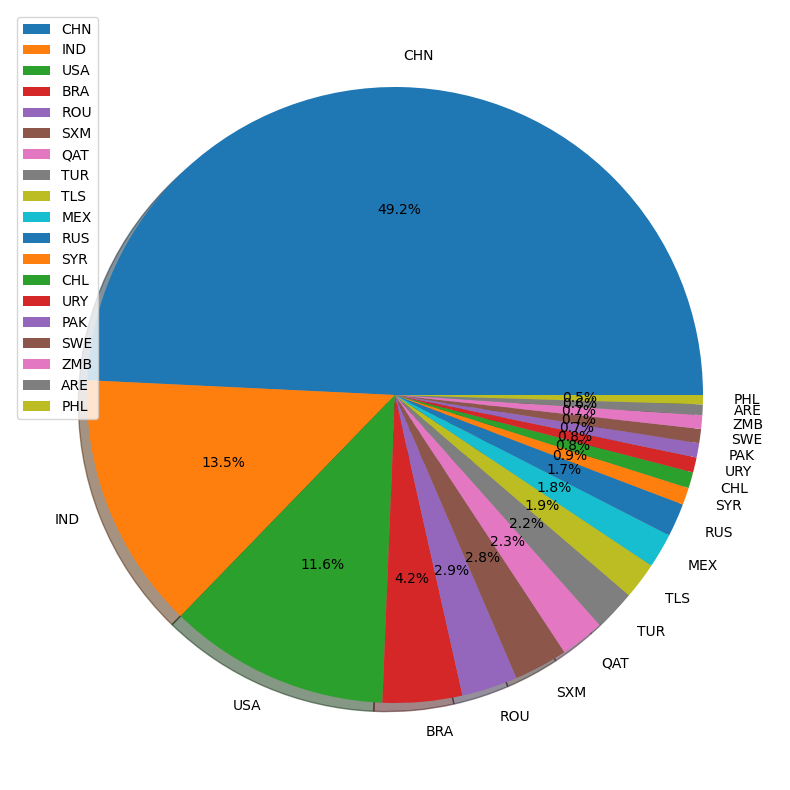

In [27]:
plt.figure(figsize=(110,10))
plt.pie(max_vac.total_vaccinations, labels = max_vac.iso_code , autopct= "%1.1f%%" , startangle= 0,shadow= True, )
plt.legend()
plt.show()

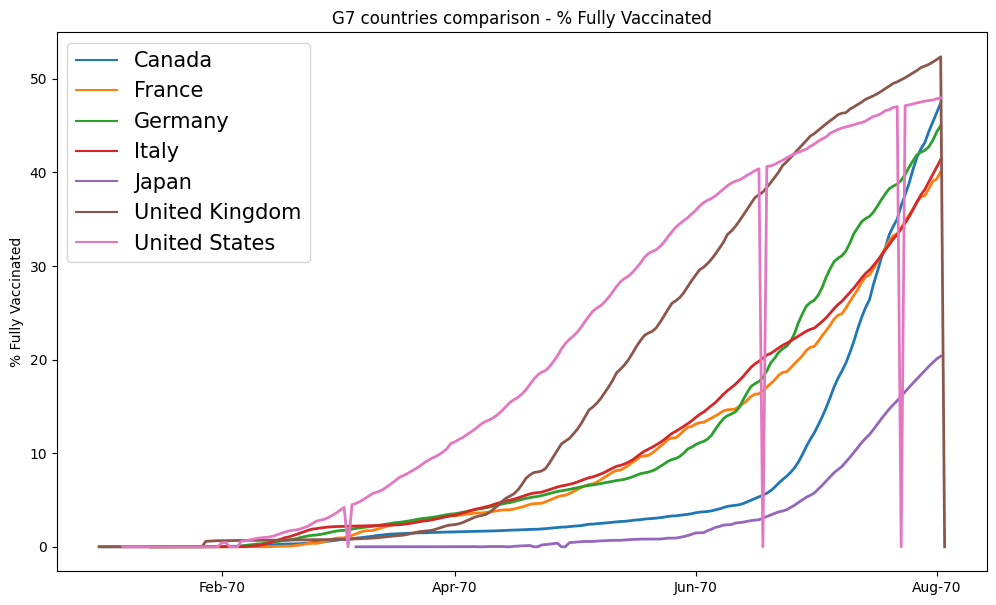

In [28]:
#Show vaccination rates of G7 countries
q_g7 = "SELECT country,date, people_fully_vaccinated_per_hundred FROM covid_df WHERE country IN ('France', 'Canada','United States','Germany','Italy','Japan','United Kingdom')  "
df_A = sqldf(q_g7 , globals())

# df_plot = covid_df.loc[:,['country', 'date', 'people_fully_vaccinated_per_hundred']]
# grpA = ['France', 'Canada', 'United States', 'Germany', 'Italy', 'Japan', 'United Kingdom']
# df_A = df_plot[df_plot['country'].isin(grpA)]

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
fig, axes = plt.subplots(figsize = (12,7))
sns.lineplot(x = 'date', y = 'people_fully_vaccinated_per_hundred', hue = 'country', data = df_A, ax = axes, linewidth = 2)
axes.xaxis.set_major_formatter(DateFormatter("%b-%y"))
axes.xaxis.set_major_locator(mdates.MonthLocator(interval = 2))
axes.set_xlabel("")
axes.set_ylabel("% Fully Vaccinated")
axes.set_title("G7 countries comparison - % Fully Vaccinated")
axes.legend(title ="", prop = {'size':15})

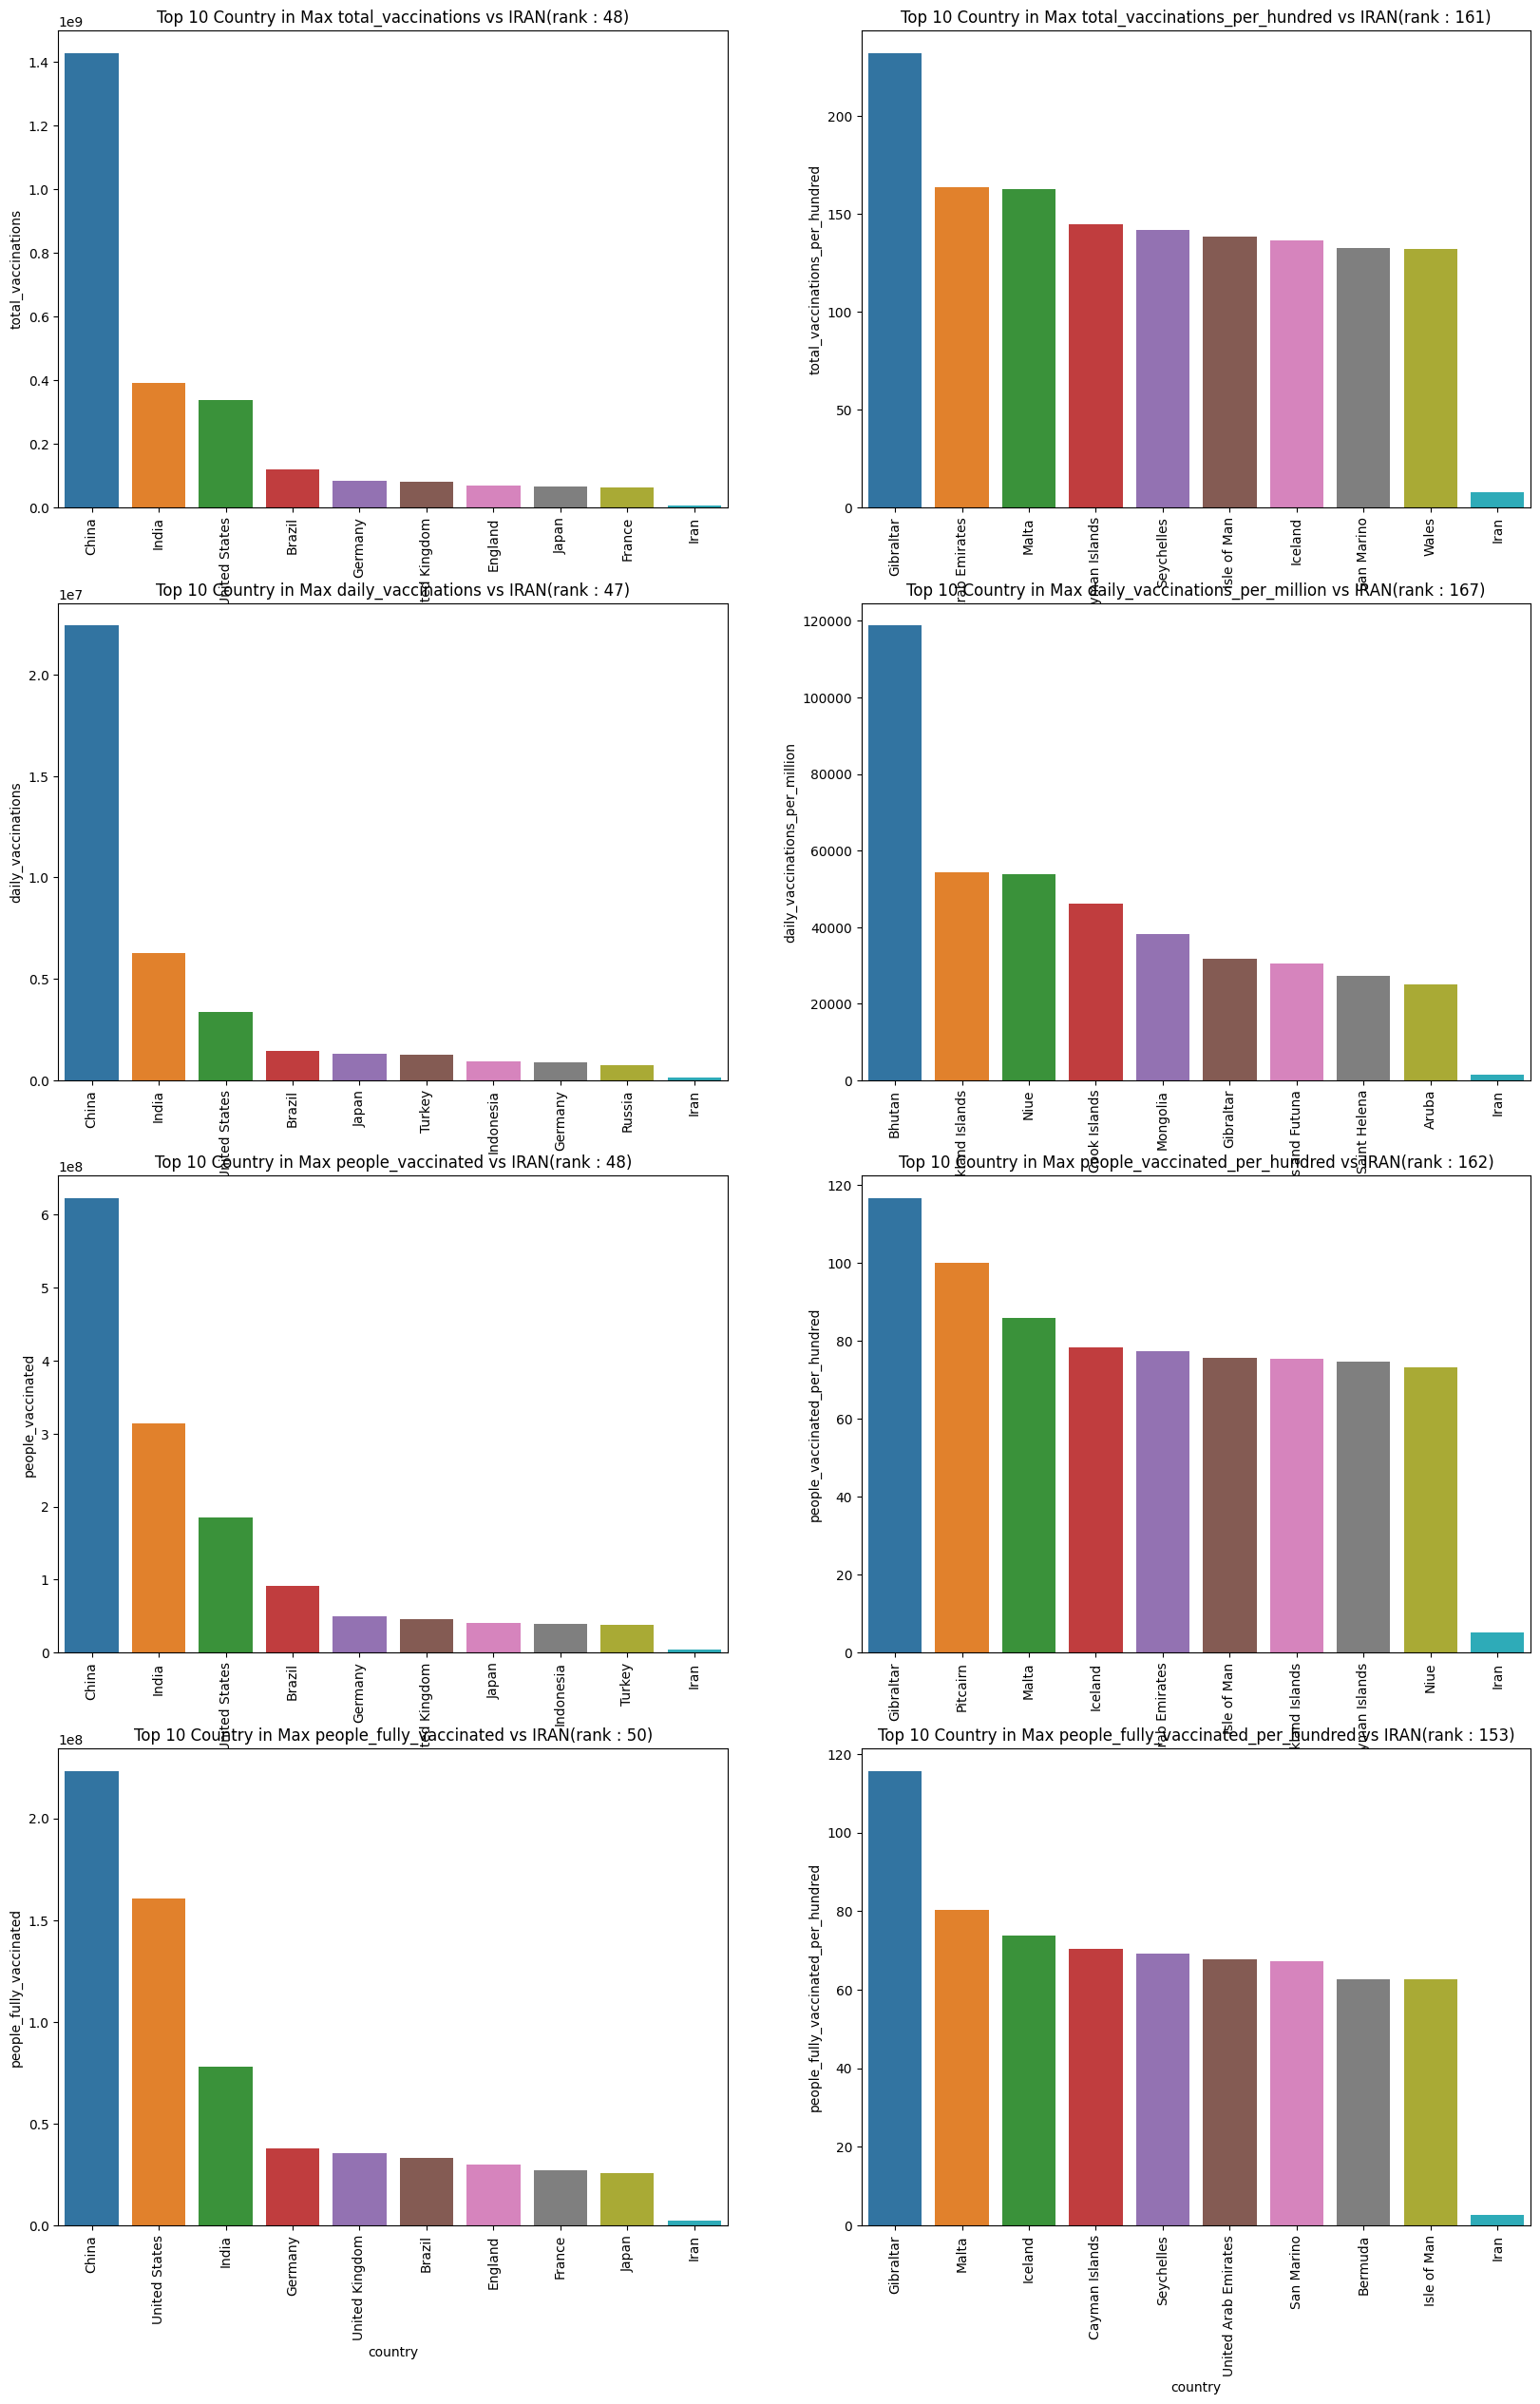

In [29]:


fig , ax = plt.subplots(4 , 2 , figsize=(20,30))

features = ['total_vaccinations','total_vaccinations_per_hundred','daily_vaccinations','daily_vaccinations_per_million',
'people_vaccinated','people_vaccinated_per_hundred','people_fully_vaccinated', 'people_fully_vaccinated_per_hundred']

country_vaccine = covid_df.groupby('country')[features].max().reset_index()

q_iran = "SELECT * FROM country_vaccine WHERE country = 'Iran'"

iran_country = sqldf(q_iran , globals())

countr = 0

for i in range(0,4):
    for j in range(0,2):
        
        iran_rank = country_vaccine.sort_values(features[countr] , ascending = False).reset_index()
        iran_rank = iran_rank[iran_rank['country'] == 'Iran'].index
        
        country_top = country_vaccine.sort_values(features[countr] , ascending = False)[0:9]
        
        country_top = pd.concat([country_top,iran_country])
        
        sns.barplot(data= country_top , x = "country" , y = features[countr] , ax = ax[i , j] )
        
        ax[i,j].set(title=f'Top 10 Country in Max {features[countr]} vs IRAN(rank : {iran_rank[0]})')
        ax[i,j].set_xticklabels(ax[i,j].get_xticklabels(),rotation=90)
        countr +=1
        


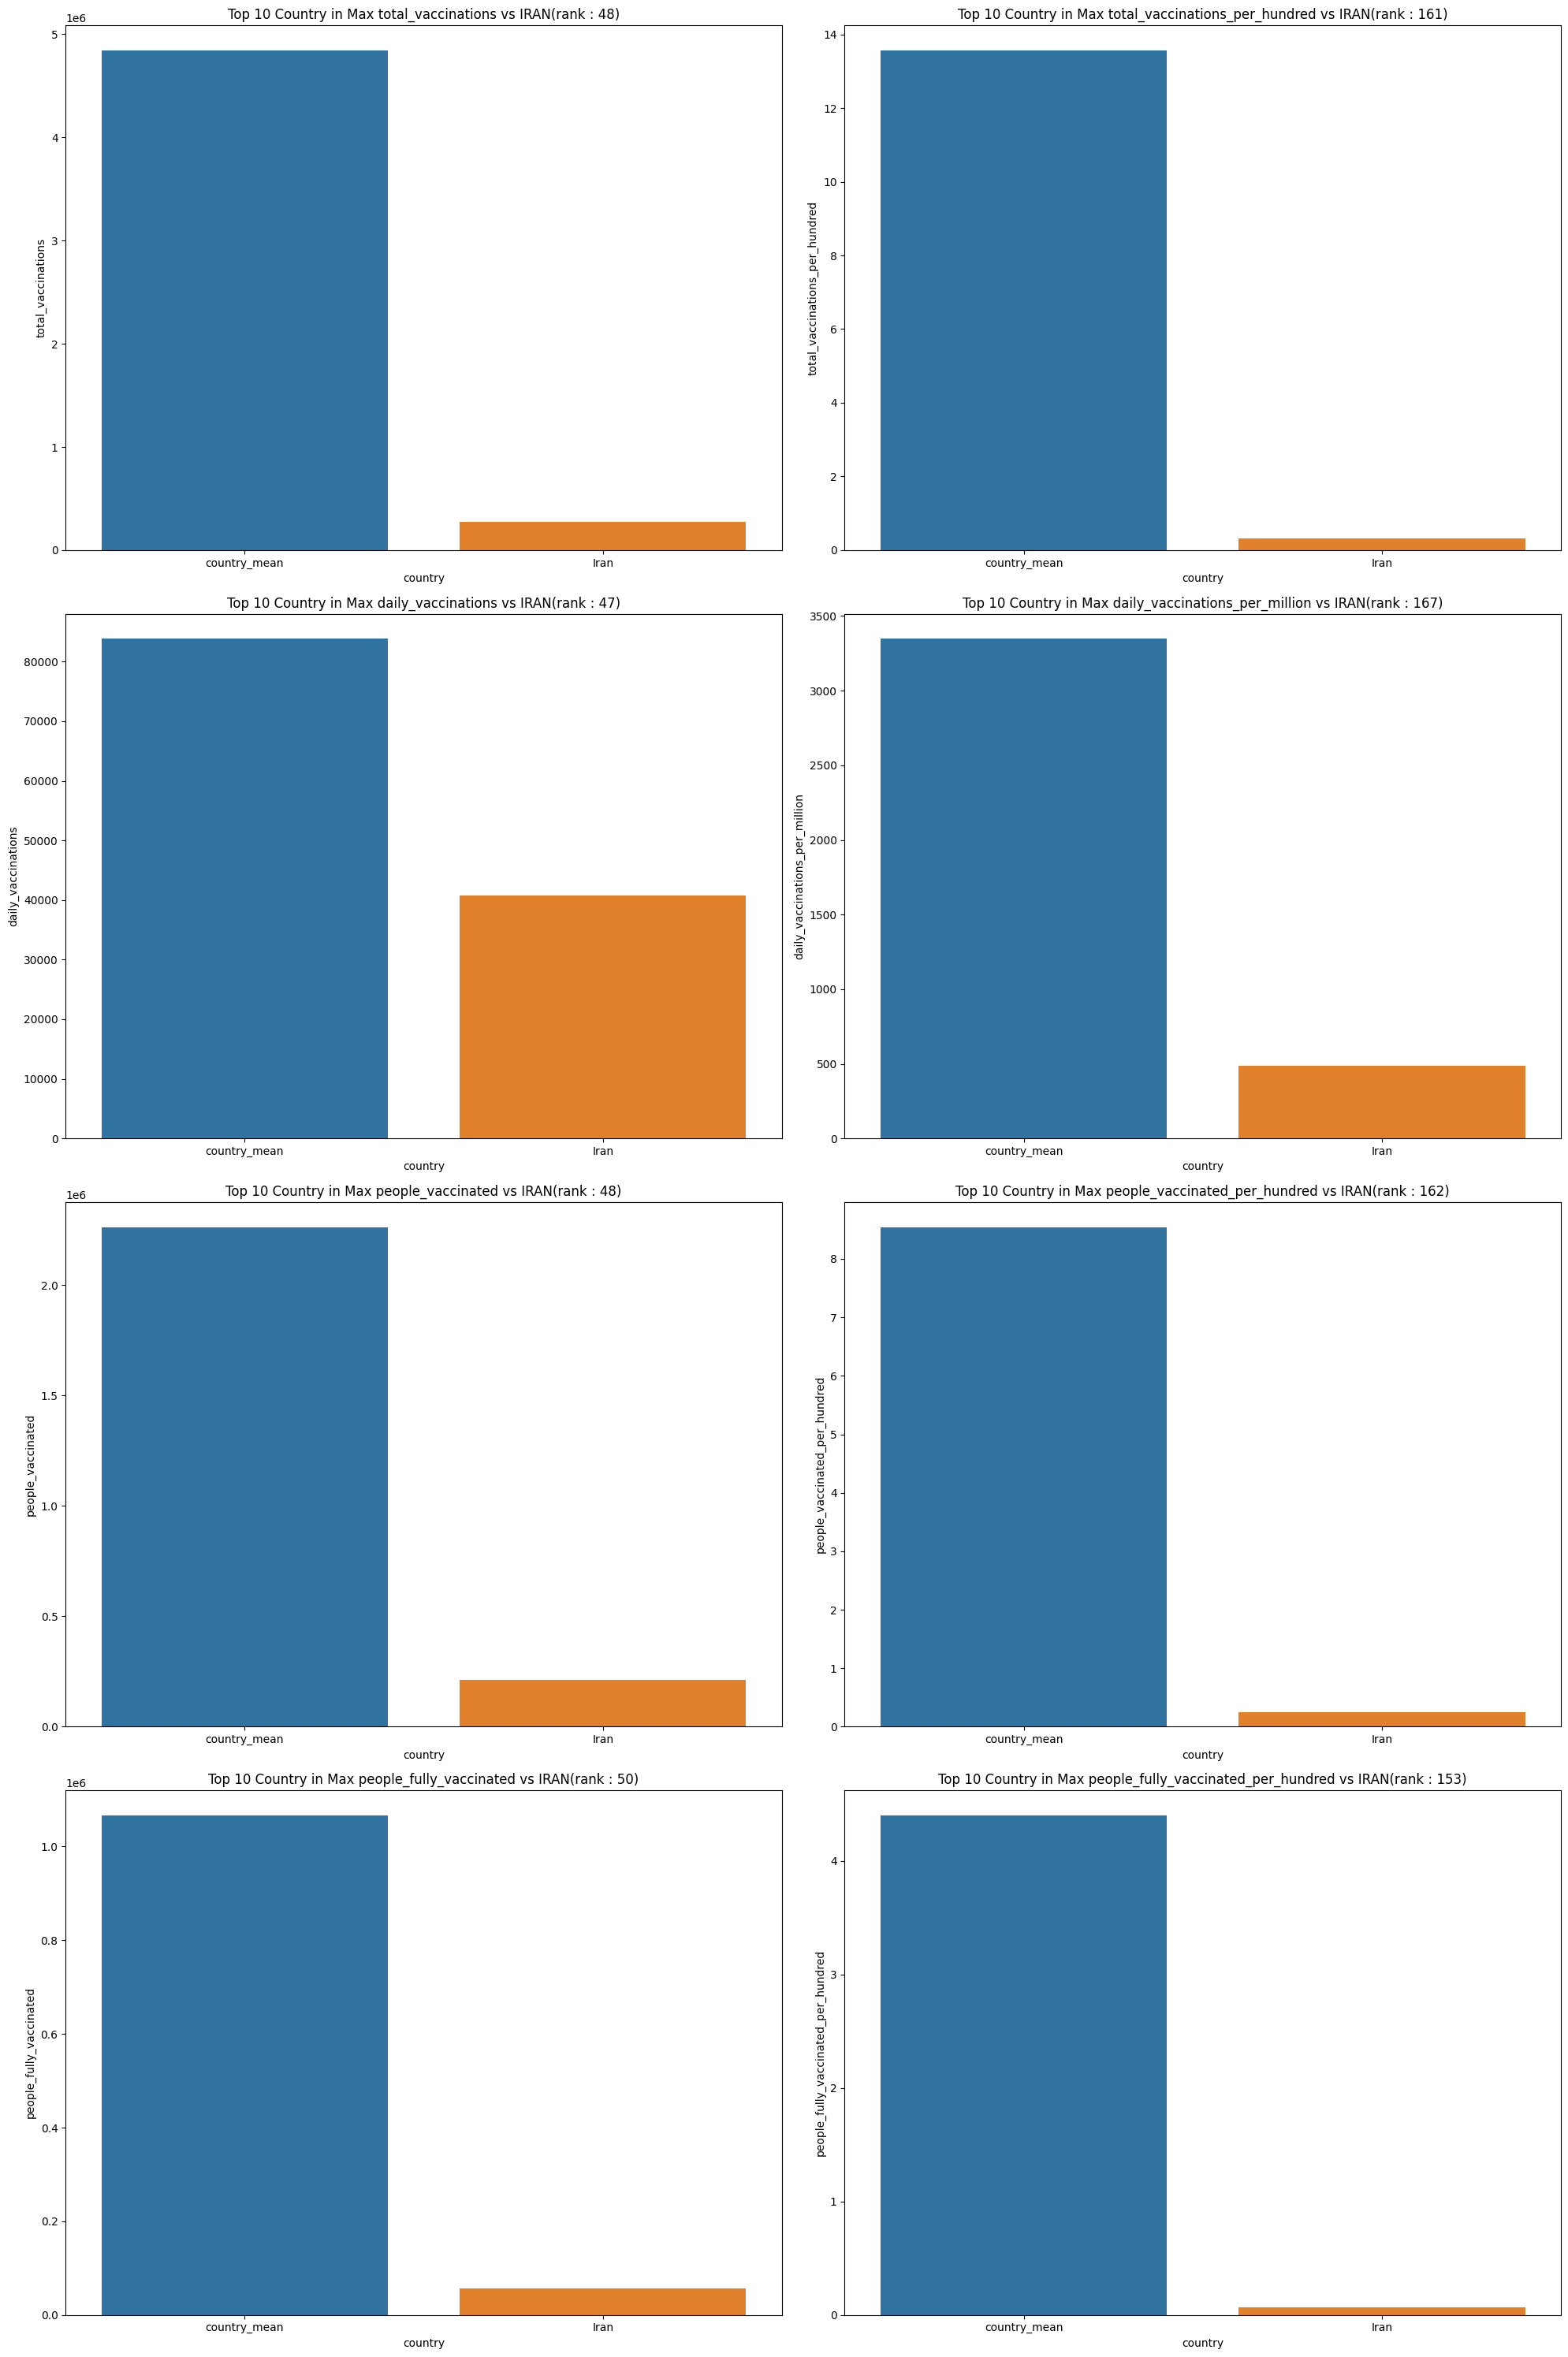

In [30]:
fig , ax = plt.subplots(4 , 2 , figsize=(20,30))

features = ['total_vaccinations','total_vaccinations_per_hundred','daily_vaccinations','daily_vaccinations_per_million',
'people_vaccinated','people_vaccinated_per_hundred','people_fully_vaccinated', 'people_fully_vaccinated_per_hundred']

country_vaccine_mean = covid_df.groupby("country")[features].mean().reset_index()
country_vaccine_mean

q_iran = "SELECT * FROM country_vaccine_mean WHERE country = 'Iran'"

iran_country = sqldf(q_iran , globals())

counter = 0

for i in range(0,4):
    for j in range(0,2):
        
        iran_rank = country_vaccine.sort_values(features[counter] , ascending = False).reset_index()
        iran_rank = iran_rank[iran_rank['country'] == 'Iran'].index
        
        country_mean = country_vaccine_mean[features[counter]].mean()
        country_mean = pd.DataFrame({'country' : ['country_mean'] , f'{features[counter]}' : [country_mean]})
        country_mean = pd.concat([country_mean , iran_country[['country',features[counter]]]])
        
        sns.barplot(data= country_mean , x = "country" , y = features[counter] , ax = ax[i , j] )
        
        ax[i,j].set(title=f'Top 10 Country in Max {features[counter]} vs IRAN(rank : {iran_rank[0]})')
        ax[i,j].set_xticklabels(ax[i,j].get_xticklabels(),rotation=0)
        counter +=1
        
        
fig.tight_layout()
plt.show()

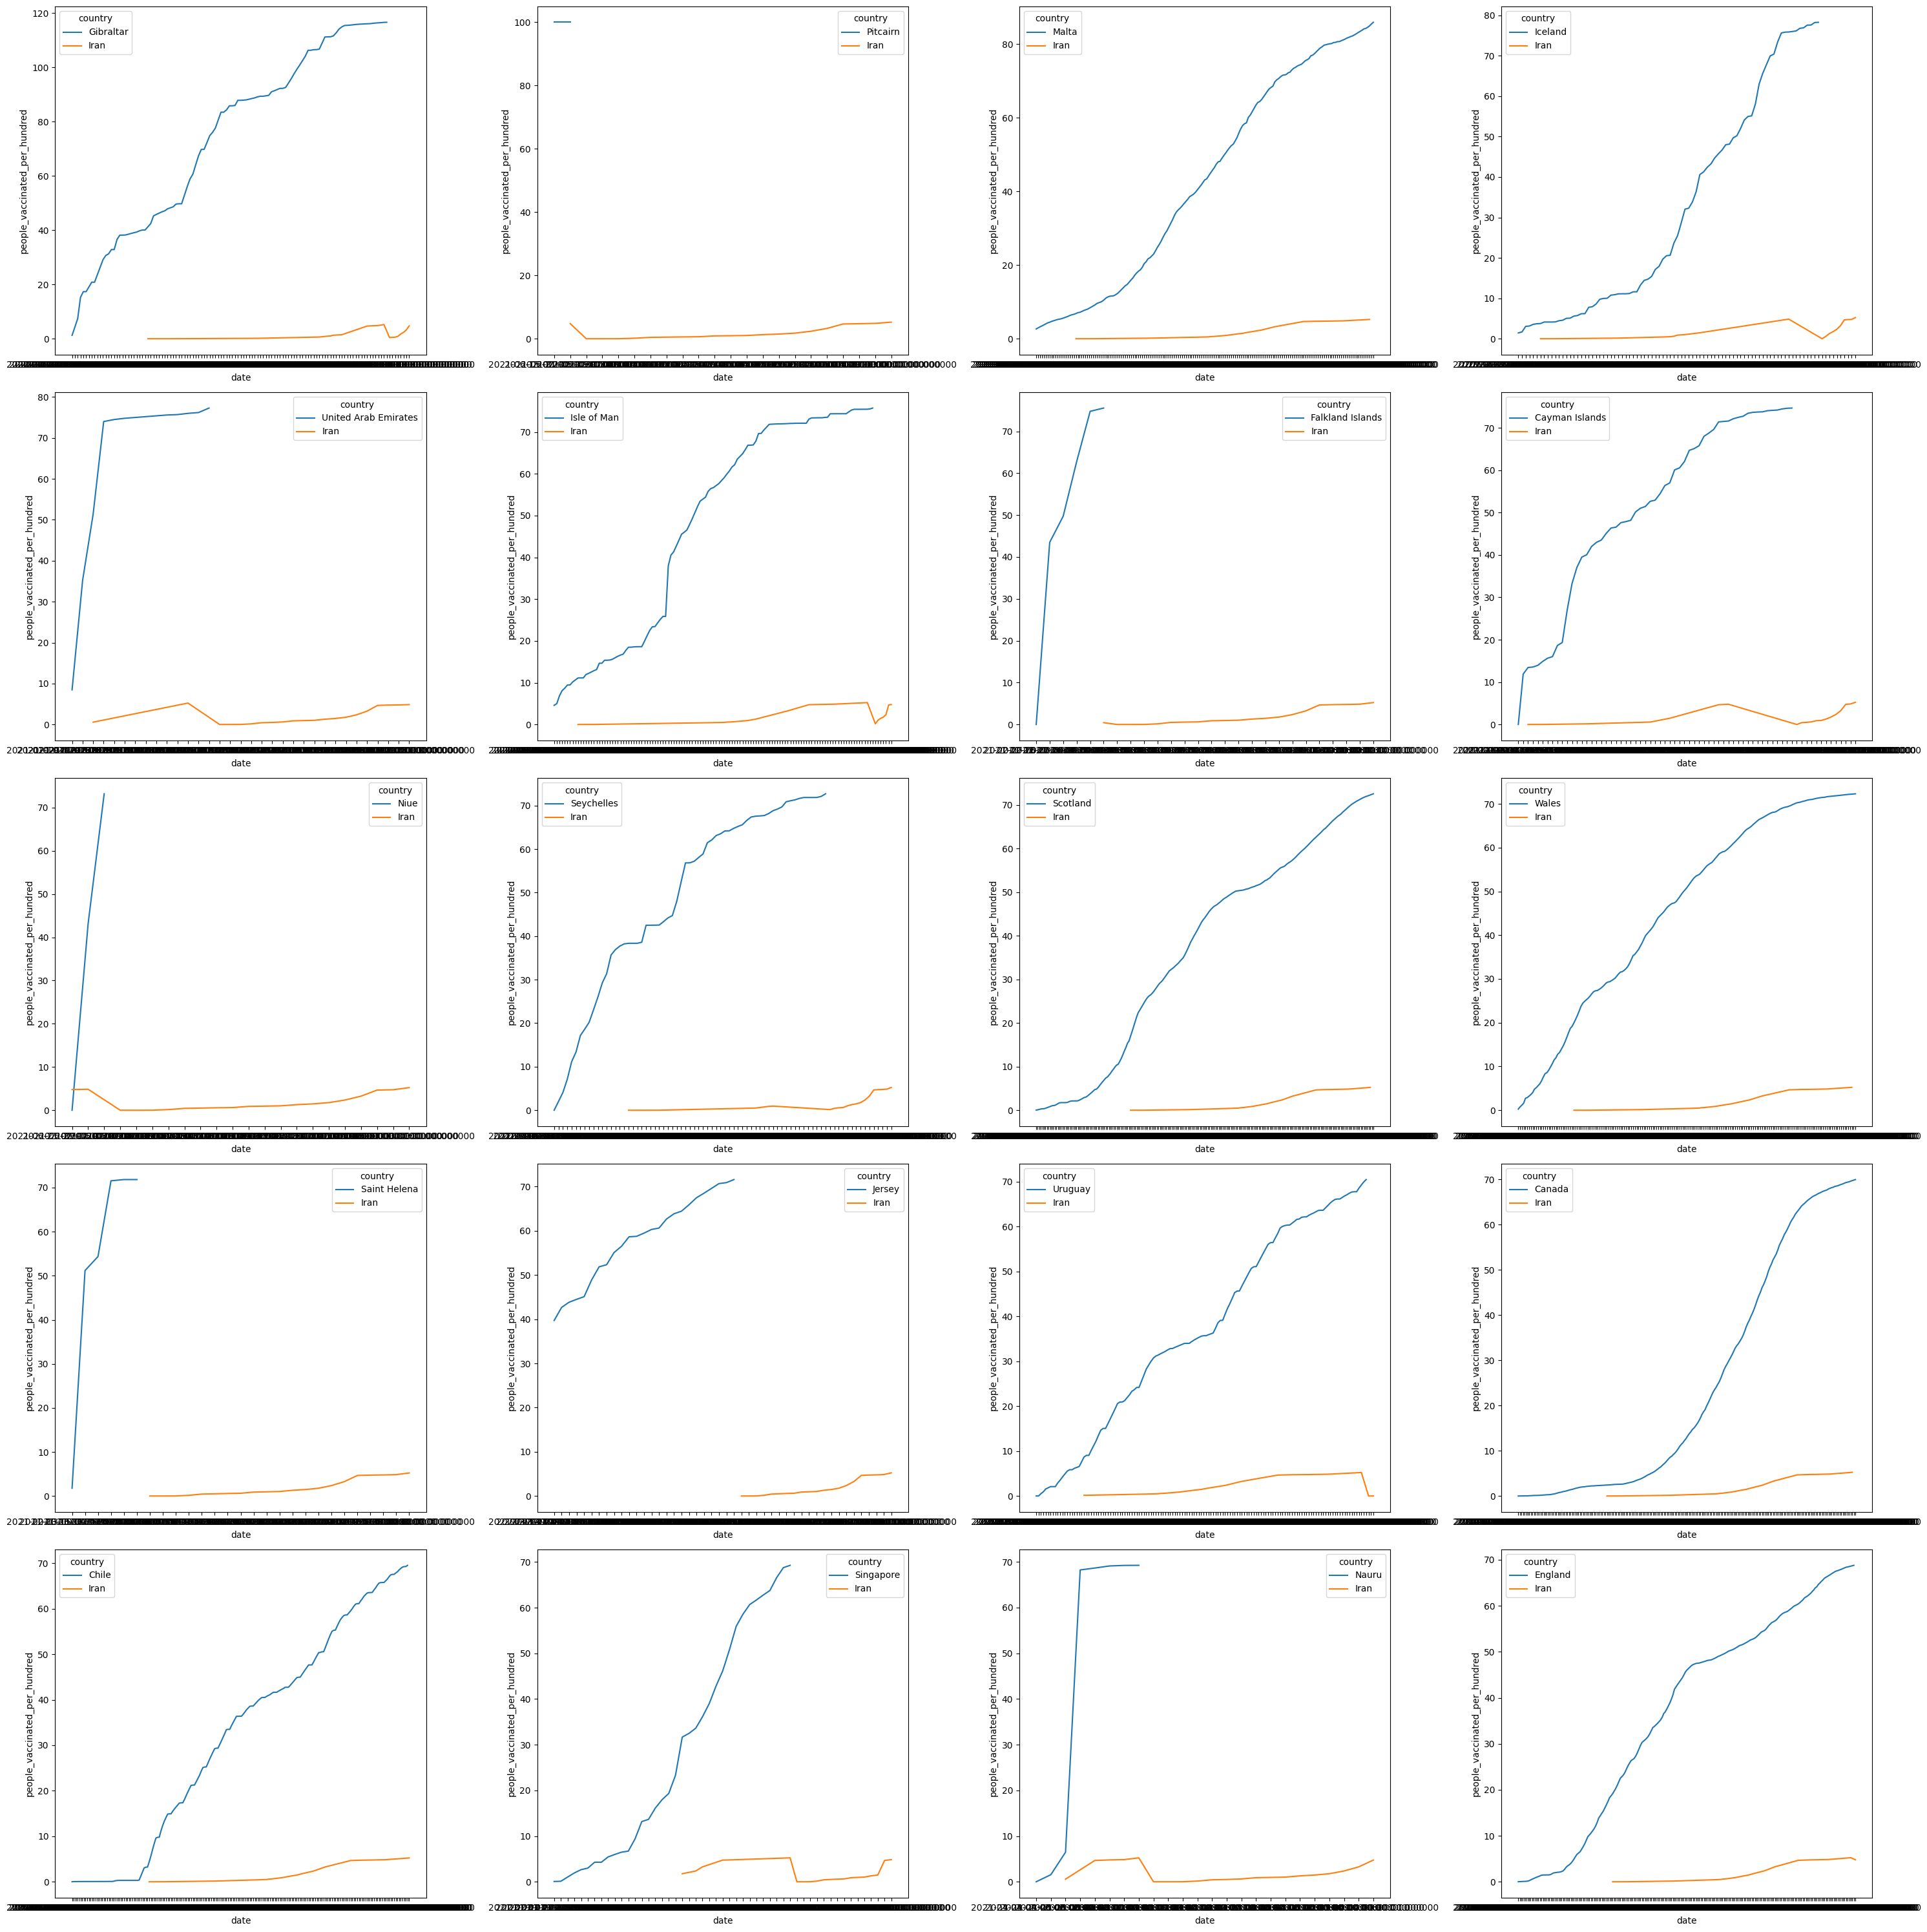

In [159]:
feature = ['date', 'people_vaccinated_per_hundred']
country_sort = covid_df.groupby('country')[feature].max()

top_country = country_sort.sort_values('people_vaccinated_per_hundred' , ascending=False).reset_index()[0:20]

fig , ax = plt.subplots(5 ,4 ,figsize = (30, 30))


q_iran = "SELECT * FROM country WHERE country = 'Iran'"

iran_country = sqldf(q_iran , globals())


name_country = top_country.loc[ : , "country"]

counter = 0

for i in range(0 , 5):
    for j in range(0,4):
        
        top_coun = country[country["country"]  == name_country[counter] ]
        countries = pd.DataFrame()
        countries = pd.concat ([top_coun , iran_country])
        sns.lineplot(x = 'date', y = 'people_vaccinated_per_hundred', hue= 'country',data = countries , ax = ax[i , j])
        
        
        counter += 1
    

fig.tight_layout()
plt.show()




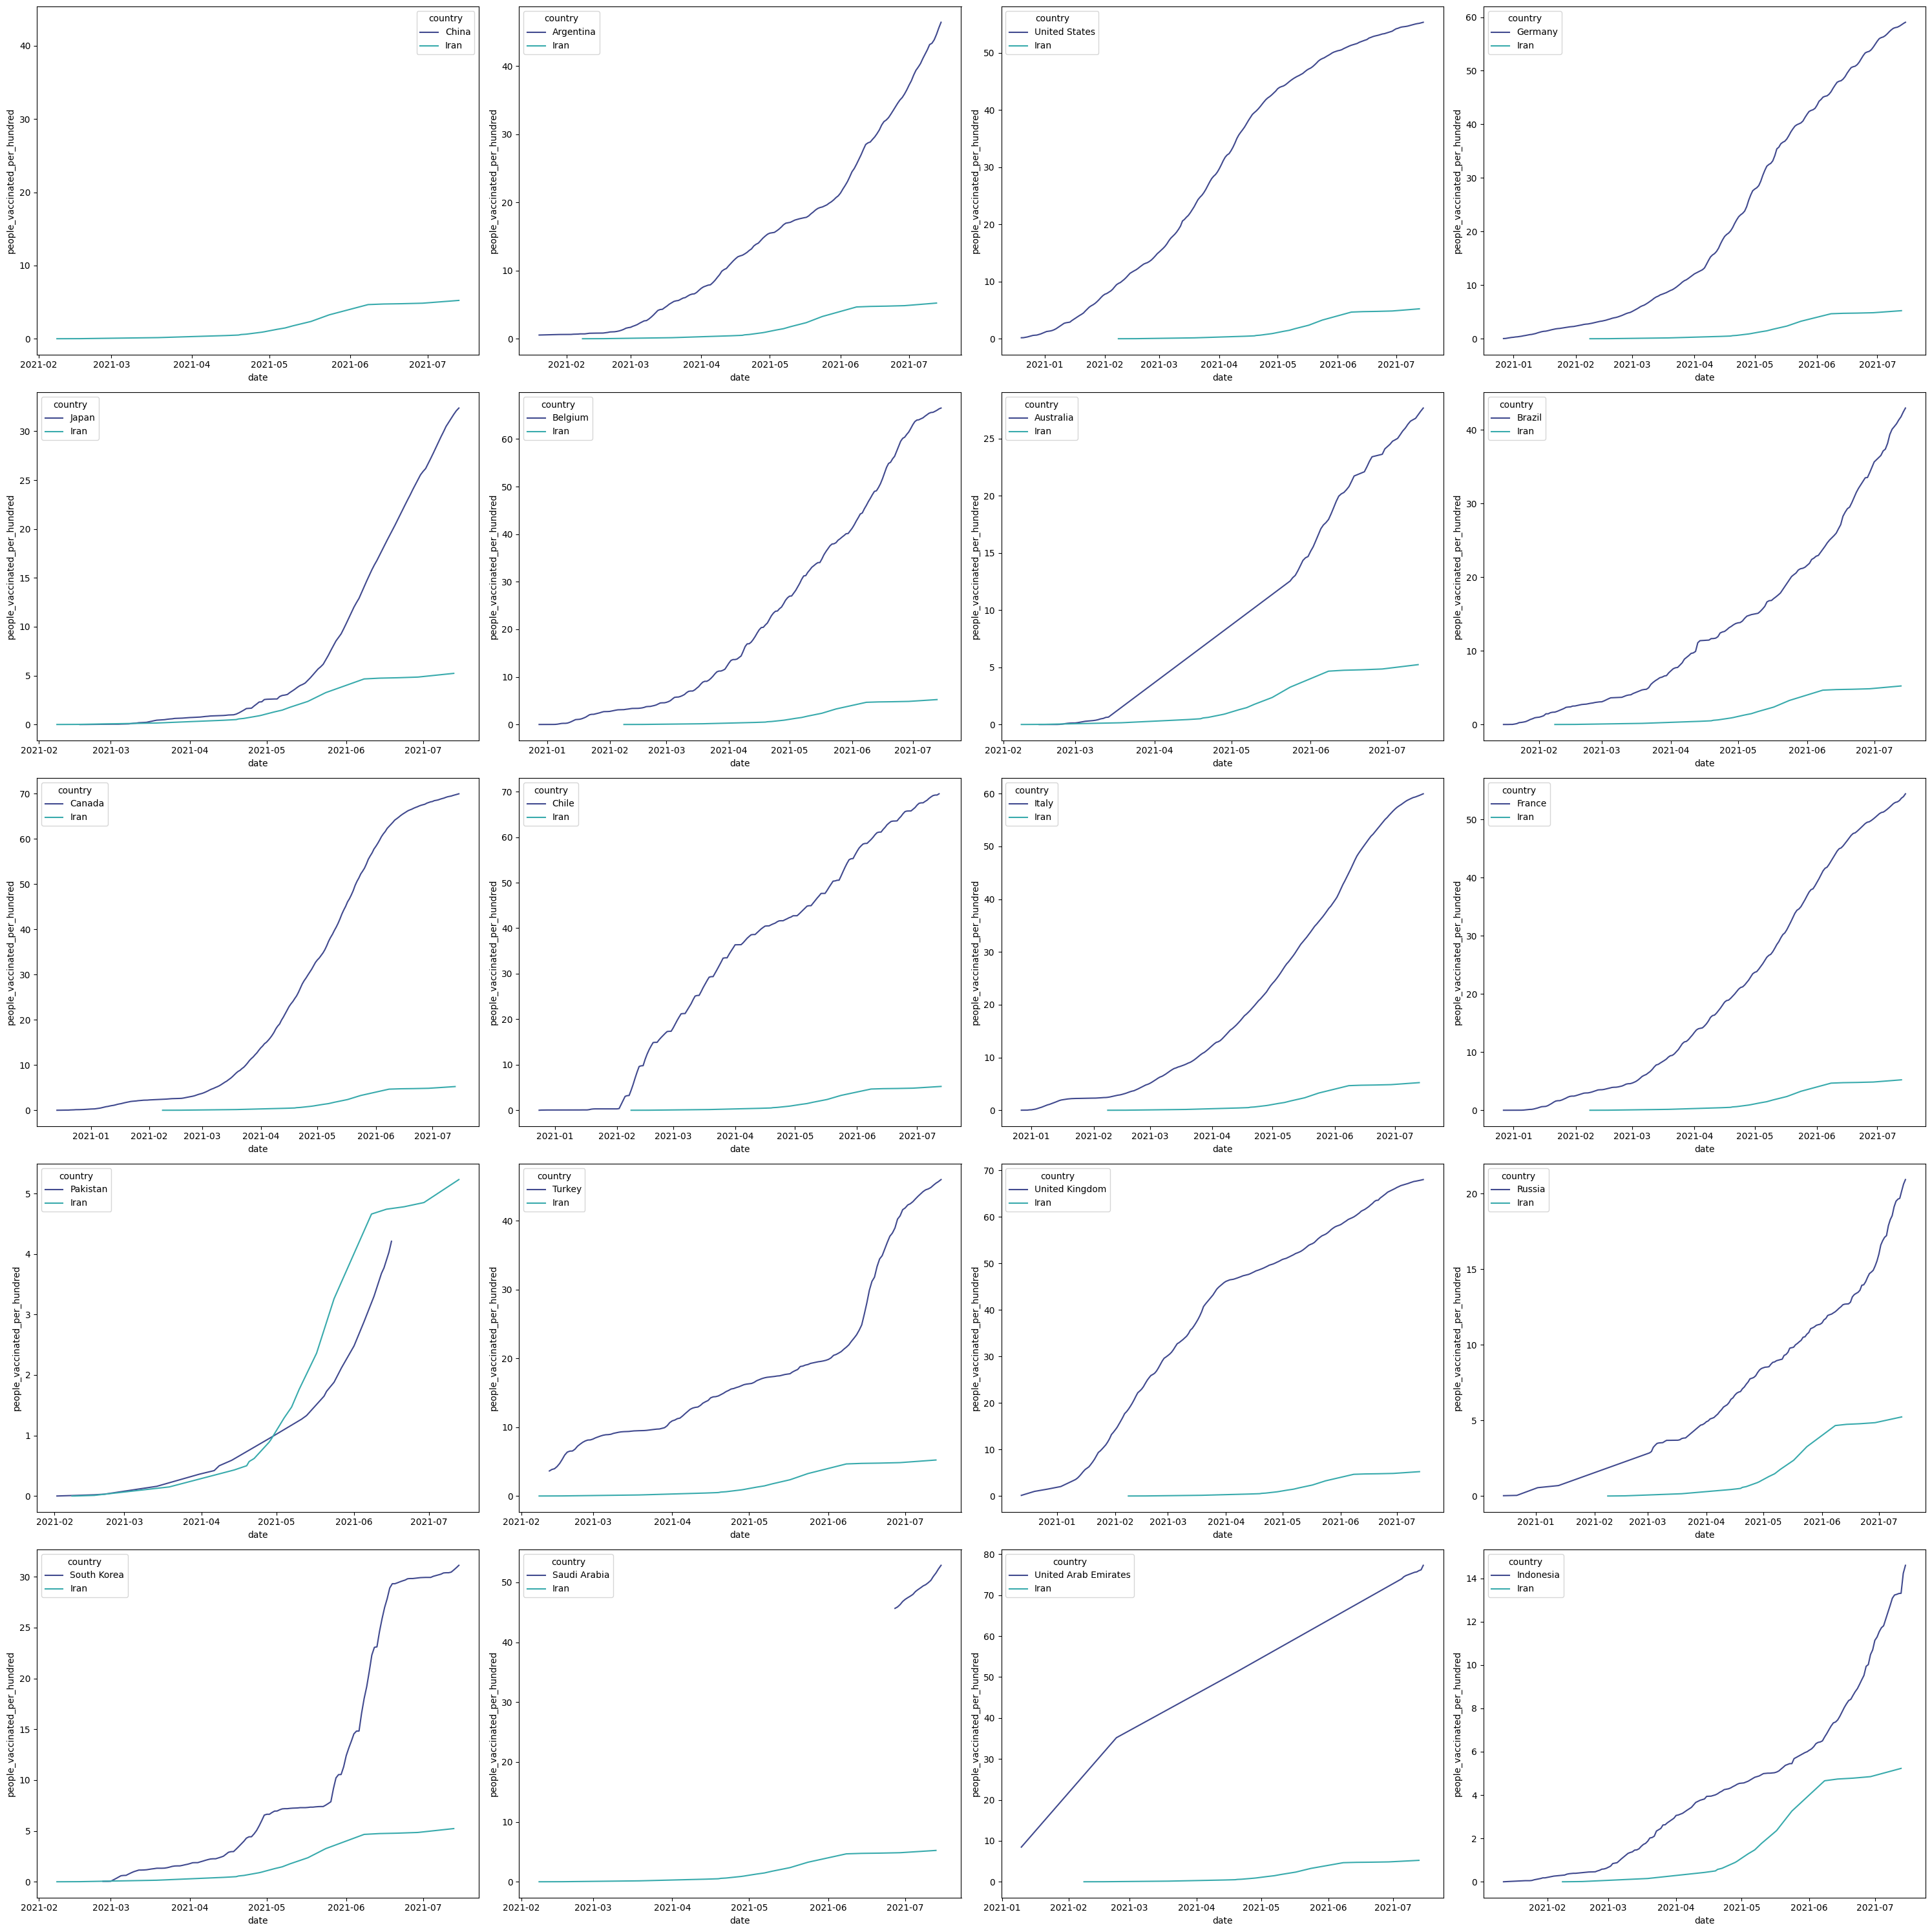

In [156]:
list_countries = ['China' , 'Argentina' , 'United States' , 'Germany' , 'Japan' , 'Belgium' , 'Australia' , 'Brazil' , 'Canada',
                  'Chile' , 'Italy' , 'France' , 'Pakistan' , 'Turkey' , 'United Kingdom' , 'Russia' , 'South Korea' , 'Saudi Arabia',
                  'United Arab Emirates' , 'Indonesia']

fig , ax = plt.subplots(5,4,figsize=(30,30))
counter = 0

for i in range(5):
    for j in range(4):

        countries = pd.DataFrame()
        countries = pd.concat([countries , covid_df[covid_df['country'] == list_countries[counter]]])
        countries = pd.concat([countries , covid_df[covid_df['country'] == 'Iran']])

        sns.lineplot(data=countries , x='date' , y='people_vaccinated_per_hundred', hue='country' , palette='mako' , ax=ax[i,j])

        counter += 1

fig.tight_layout()
plt.show()